# 1. Thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from datetime import datetime, date

In [3]:
df = pd.read_csv('BTC_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.942767
1,2020-06-02,1.026858
2,2020-06-03,0.951614
3,2020-06-04,0.966706
4,2020-06-05,0.981137
...,...,...
381,2021-06-17,3.855748
382,2021-06-18,3.772202
383,2021-06-19,3.552045
384,2021-06-20,3.565630


### Vẽ sơ đồ minh họa

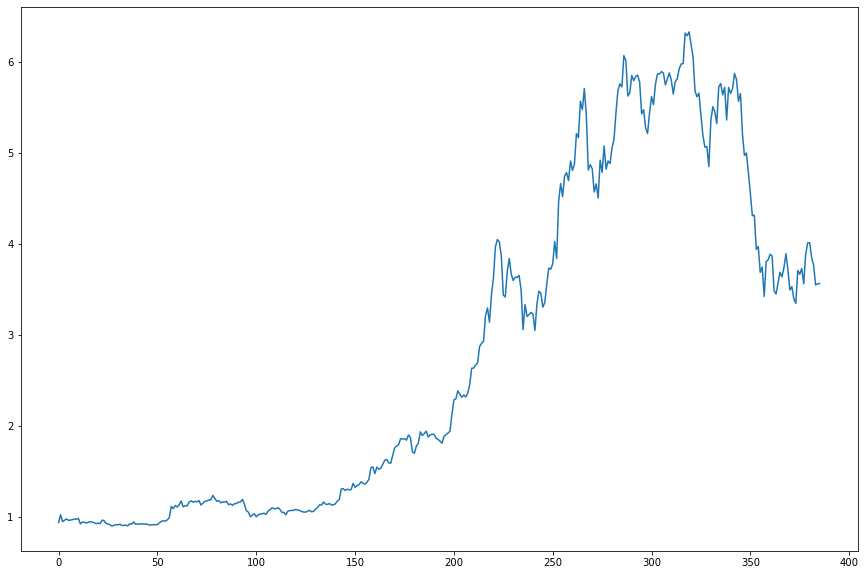

In [5]:
df['ClosingPrice'].plot(kind='line',figsize=(15, 10))

plt.show()

# 2. Tiền xử lý và Chia train/test

In [6]:
df["timestamp"] = pd.to_datetime(df.Date).astype(np.int64)
df

,Date,ClosingPrice,timestamp
0,2020-06-01,0.942767,1590969600000000000
1,2020-06-02,1.026858,1591056000000000000
2,2020-06-03,0.951614,1591142400000000000
3,2020-06-04,0.966706,1591228800000000000
4,2020-06-05,0.981137,1591315200000000000
...,...,...,...
381,2021-06-17,3.855748,1623888000000000000
382,2021-06-18,3.772202,1623974400000000000
383,2021-06-19,3.552045,1624060800000000000
384,2021-06-20,3.565630,1624147200000000000


In [7]:
df.pop('Date')
df

,ClosingPrice,timestamp
0,0.942767,1590969600000000000
1,1.026858,1591056000000000000
2,0.951614,1591142400000000000
3,0.966706,1591228800000000000
4,0.981137,1591315200000000000
...,...,...
381,3.855748,1623888000000000000
382,3.772202,1623974400000000000
383,3.552045,1624060800000000000
384,3.565630,1624147200000000000


In [8]:
df = df.values
X = df[:,1].reshape(-1,1)
Y = df[:,0:1]

In [14]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

### Chia train/test

In [16]:
trainX, testX = X[0:train_size,:], X[train_size:len(df),:]
print(len(trainX), len(testX))

308 78


In [19]:
trainY, testY = Y[0:train_size,:], Y[train_size:len(df),:]
print(len(trainY), len(testY))

308 78


# 3. Chạy Model

In [20]:
#RBF
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(trainX,trainY)

c:\users\minh nhut\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
SVR_predict = rbf_svr.predict(testX)

In [33]:
SVR_predict

array([5.74783379, 5.75041146, 5.75207196, 5.75281827, 5.75265406,
       5.75158367, 5.74961206, 5.74674487, 5.74298837, 5.73834945,
       5.73283563, 5.72645505, 5.71921645, 5.71112915, 5.70220308,
       5.6924487 , 5.68187705, 5.6704997 , 5.65832875, 5.64537681,
       5.631657  , 5.6171829 , 5.60196856, 5.58602848, 5.56937759,
       5.55203123, 5.53400512, 5.51531538, 5.49597847, 5.47601119,
       5.45543064, 5.43425424, 5.41249969, 5.39018492, 5.36732812,
       5.34394768, 5.32006219, 5.29569043, 5.27085132, 5.2455639 ,
       5.21984736, 5.19372095, 5.16720401, 5.14031593, 5.11307611,
       5.08550401, 5.05761903, 5.02944058, 5.00098801, 4.97228061,
       4.94333758, 4.91417803, 4.88482094, 4.85528516, 4.82558938,
       4.79575214, 4.76579177, 4.73572642, 4.70557399, 4.6753522 ,
       4.64507847, 4.61477   , 4.58444371, 4.55411623, 4.52380388,
       4.49352271, 4.46328841, 4.43311638, 4.40302164, 4.3730189 ,
       4.34312251, 4.31334642, 4.28370426, 4.25420926, 4.22487

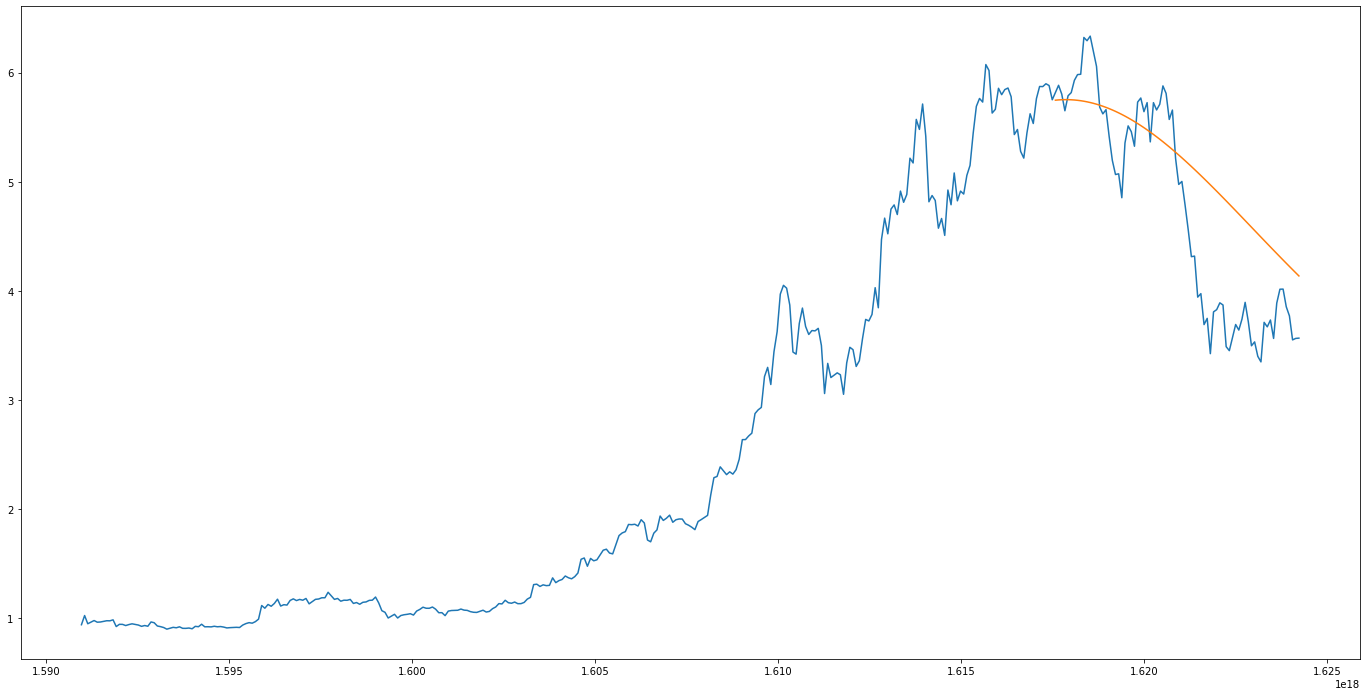

In [34]:
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(testX,SVR_predict)
plt.show()

# 4.  Đánh Giá mô hình

In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
#MAPE
mean_absolute_percentage_error(testY, SVR_predict.reshape(-1,1))

13.830787341444678

In [37]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, SVR_predict.reshape(-1,1))
RMSE = math.sqrt(MSE)
print(RMSE)

0.6909660870536171
